# Overturning Circulation
Overturning circulation in density space using ty_trans_rho.

In [1]:
%matplotlib inline

from cosima_cookbook import get_nc_variable, expts
from cosima_cookbook import memory
import matplotlib.pyplot as plt
import numpy as np


/mnt/miniconda3/envs/cosima/lib/python3.6/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


We will zonally average this diagnostic, without accounting for the tripolar grid, so ignore the Arctic.

In [2]:
@memory.cache
def calc_psi_avg(expt):
    print('Calculating {} psi_avg'.format(expt))
    
    op = lambda p: p.sum('grid_xt_ocean').cumsum('potrho')

    psi = get_nc_variable(expt, 'ocean.nc', 'ty_trans_rho',
                        op=op,
                        chunks={'potrho': None}, n=5)

    psi_avg = psi.mean('time')
    psi_avg = psi_avg.compute()
    
    return psi_avg

In [4]:
def plot_psi(psi_avg, expt, clev=np.arange(-20,20,2)):

    plt.contourf(psi_avg.grid_yu_ocean, 
                 psi_avg.potrho, 
                 psi_avg, 
                 cmap=plt.cm.PiYG,levels=clev,extend='both')
    cb=plt.colorbar(orientation='vertical', shrink = 0.7)
    cb.ax.set_xlabel('Sv')
    plt.contour(psi_avg.grid_yu_ocean, 
                psi_avg.potrho, 
                psi_avg, levels=clev, colors='k', linewidths=0.25)
    plt.contour(psi_avg.grid_yu_ocean,
                psi_avg.potrho, psi_avg,
                levels=[0.0,], colors='k', linewidths=0.5)
    plt.gca().invert_yaxis()
    
    plt.ylim((1037.5,1034))
    plt.ylabel('Potential Density (kg m$^{-3}$)')
    plt.xlabel('Latitude ($^\circ$N)')
    plt.xlim([-75,85])
    plt.title('Overturning in %s' % expt)

Calculating mom01v5/KDS75_PI psi_avg
Calculating mom01v5/KDS75_UP psi_avg
Calculating mom01v5/KDS75_wind psi_avg
Calculating mom025/mom025_jra_ryf0304 psi_avg
Calculating mom025/mom025_jra_ryf8485 psi_avg
Calculating mom025/mom025_jra_ryf9091 psi_avg
Calculating mom025/mom025_nyf psi_avg
Calculating mom025/mom025_nyf_salt psi_avg


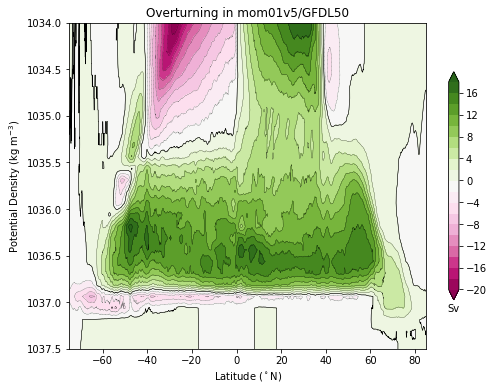

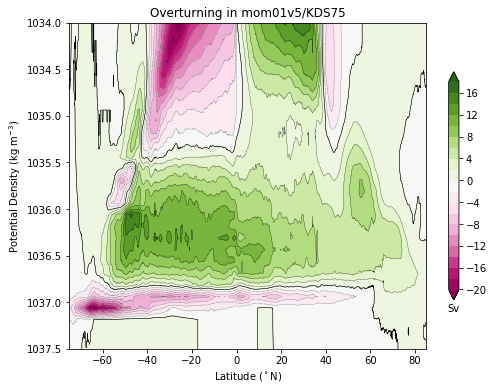

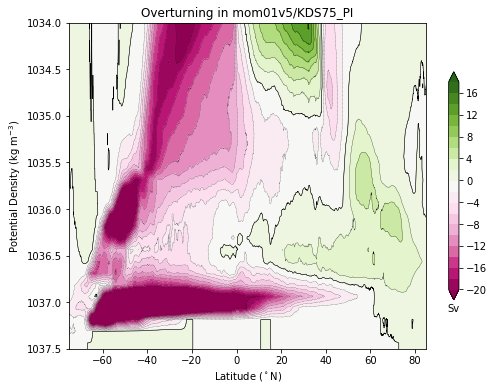

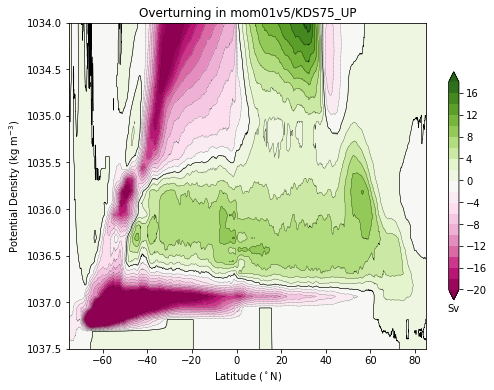

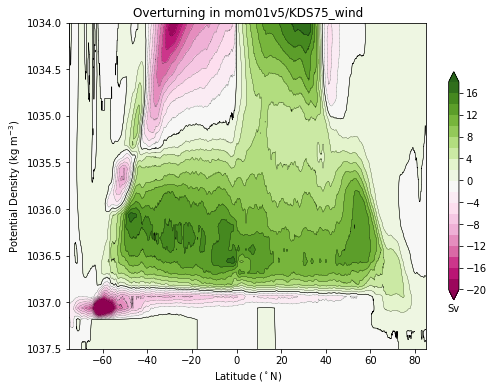

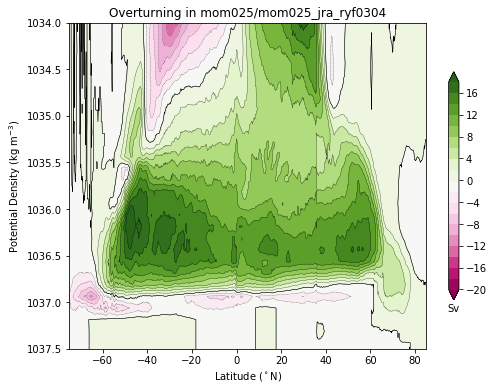

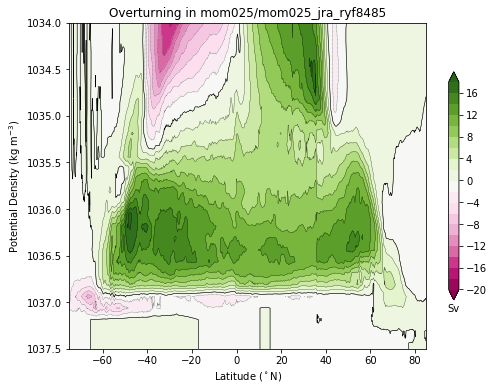

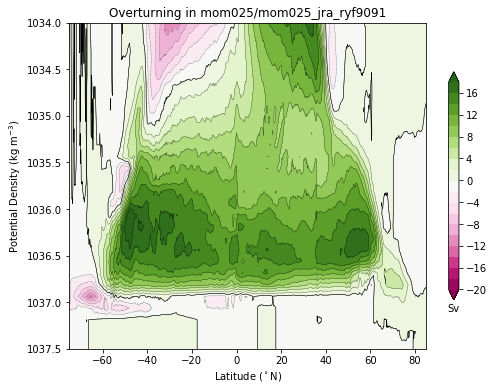

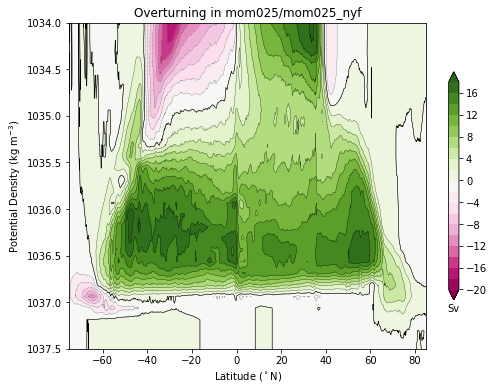

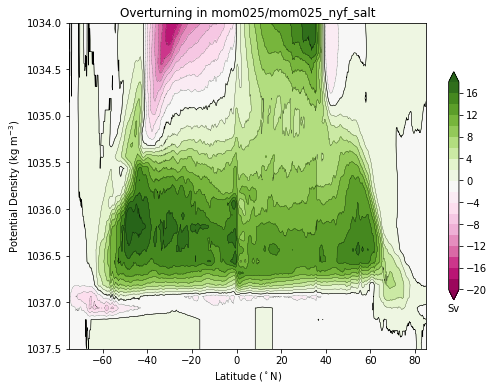

In [15]:
for expt in expts: 
    plt.figure(figsize=(8, 6)) 
    psi_avg = calc_psi_avg(expt)
    plot_psi(psi_avg, expt)